# Fase 1

Coeficiente de correlação para o Grupo 1: 0.81642
Coeficiente de correlação para o Grupo 2: 0.80612
Coeficiente de correlação para o Grupo 3: 0.81652
Regressão para o Grupo 1: beta0 = 3.00009, beta1 = 0.50009
Regressão para o Grupo 2: beta0 = 3.06473, beta1 = 0.49018
Regressão para o Grupo 3: beta0 = 3.00173, beta1 = 0.49991


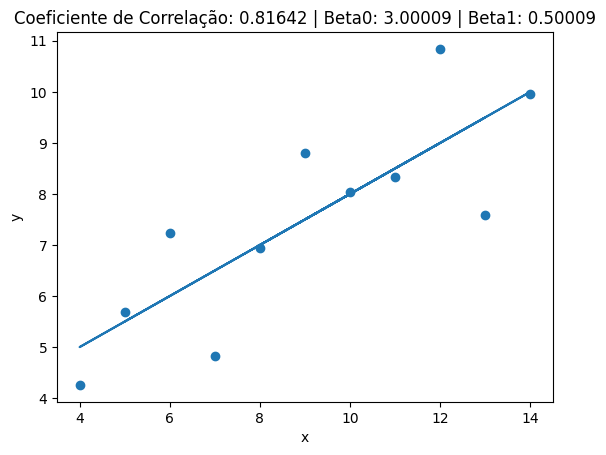

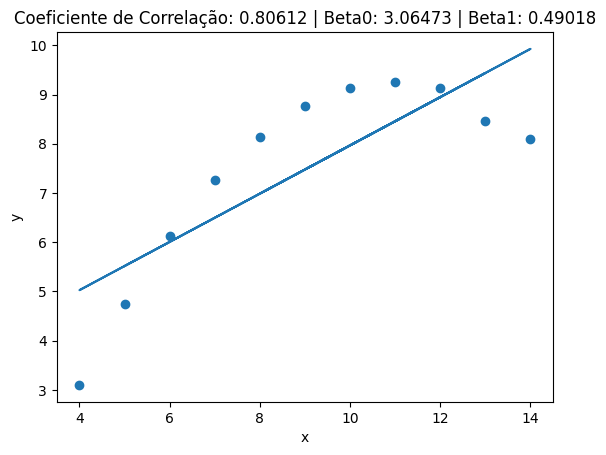

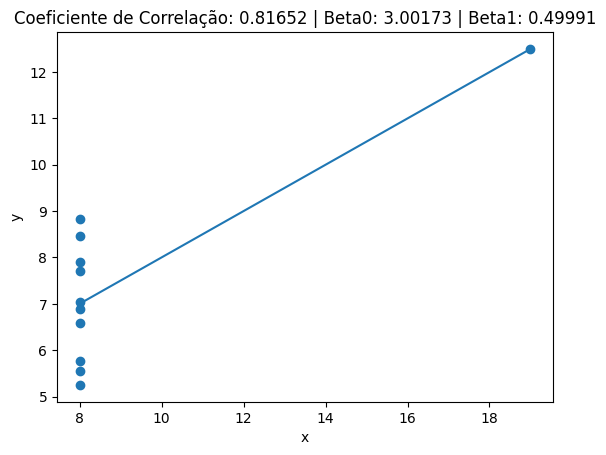

In [4]:
import math
import matplotlib.pyplot as plt

x1 = [10,8,13,9,11,14,6,4,12,7,5]
y1 = [8.04,6.95,7.58,8.81,8.33,9.96,7.24,4.26,10.84,4.82,5.68]


x2 = [10,8,13,9,11,14,6,4,12,7,5]
y2 = [9.14,8.14,8.47,8.77,9.26,8.10,6.13,3.10,9.13,7.26,4.74]


x3 = [8,8,8,8,8,8,8,8,8,8,19]
y3 = [6.58,5.76,7.71,8.84,8.47,7.04,5.25,5.56,7.91,6.89,12.50]


def correlacao(x, y):
  n = len(x)
  media_x = sum(x) / n
  media_y = sum(y) / n

  produto = [(x[i] - media_x) * (y[i] - media_y) for i in range(n)]
  soma_produto = sum(produto)

  soma_quadrados_x = sum([(xi - media_x)**2 for xi in x])
  soma_quadrados_y = sum([(yi - media_y)**2 for yi in y])

  r = soma_produto / math.sqrt(soma_quadrados_x * soma_quadrados_y)
  return r

def regressao(x, y):
    n = len(x)
    media_x = sum(x) / n
    media_y = sum(y) / n

    # cálculo de beta1 (coeficiente angular)
    numerador = sum((xi - media_x) * (yi - media_y) for xi, yi in zip(x, y))
    denominador = sum((xi - media_x) ** 2 for xi in x)

    beta1 = numerador / denominador

    # cálculo de beta0
    beta0 = media_y - beta1 * media_x

    return beta0, beta1

def gerar_grafico_dispersao(x, y):
    plt.scatter(x, y)
    plt.xlabel('x')
    plt.ylabel('y')

def y_de_chapeu(x, beta0, beta1):
    return [beta0 + (beta1 * x_atual) for x_atual in x]

def gerar_linha_regressao(x, beta0, beta1):
    plt.plot(x, y_de_chapeu(x, beta0, beta1))

def main():
  r1 = correlacao(x1, y1)
  r2 = correlacao(x2, y2)
  r3 = correlacao(x3, y3)

  print(f"Coeficiente de correlação para o Grupo 1: {r1:.5f}")
  print(f"Coeficiente de correlação para o Grupo 2: {r2:.5f}")
  print(f"Coeficiente de correlação para o Grupo 3: {r3:.5f}")

  beta0_1, beta1_1 = regressao(x1, y1)
  beta0_2, beta1_2 = regressao(x2, y2)
  beta0_3, beta1_3 = regressao(x3, y3)

  print(f"Regressão para o Grupo 1: beta0 = {beta0_1:.5f}, beta1 = {beta1_1:.5f}")
  print(f"Regressão para o Grupo 2: beta0 = {beta0_2:.5f}, beta1 = {beta1_2:.5f}")
  print(f"Regressão para o Grupo 3: beta0 = {beta0_3:.5f}, beta1 = {beta1_3:.5f}")

  gerar_grafico_dispersao(x1, y1)
  gerar_linha_regressao(x1, beta0_1, beta1_1)
  plt.title(f'Coeficiente de Correlação: {r1:.5f} | Beta0: {beta0_1:.5f} | Beta1: {beta1_1:.5f}')
  plt.show()

  gerar_grafico_dispersao(x2, y2)
  gerar_linha_regressao(x2, beta0_2, beta1_2)
  plt.title(f'Coeficiente de Correlação: {r2:.5f} | Beta0: {beta0_2:.5f} | Beta1: {beta1_2:.5f}')
  plt.show()

  gerar_grafico_dispersao(x3, y3)
  gerar_linha_regressao(x3, beta0_3, beta1_3)
  plt.title(f'Coeficiente de Correlação: {r3:.5f} | Beta0: {beta0_3:.5f} | Beta1: {beta1_3:.5f}')
  plt.show()

if __name__ == "__main__":
    main()


# Fase 3: Regressão Polinomial - Overfitting

Nesta fase iremos considerar a Regressão Polinomial com uma variável x.  A Regressão Polinomial encaixa uma relação não linear entre o valor de x e o valor correspondente de y. Neste caso a fórmula geral da Regressão Polinomial é:

$y = \beta_0 + \beta_1X + \beta_2X^2 + \beta_3X^3 + … + \beta_NX^N$




Desta vez, para calcular o valor de 𝛽 use a função polyfit. Você deverá verificar o que acontece quando vamos aumentamos o grau de um polinômio, ou seja, quando consideramos N = 1, 2, 3 ...

a) Baixe o arquivo data_preg.mat ou data_preg.csv. A primeira coluna representa os valores de x e a segunda coluna representa os valores de y.

In [2]:
import pandas as pd

data = pd.read_csv("content/data_preg.csv", header=None)

b) Faça o Gráfico de dispersão dos dados.

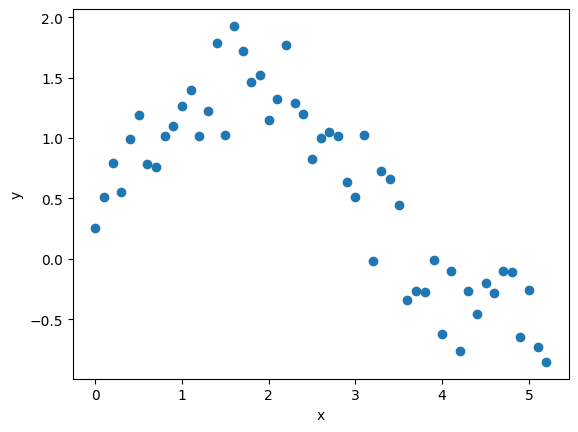

In [5]:
x = data[0]
y = data[1]
gerar_grafico_dispersao(x, y)

c) Use a função polyfit para gerar a linha de regressão para N = 1 e trace-o no gráfico de dispersão na cor vermelha (plot (x, y, 'r')). (Observe que nesta função a numeração coeficiente é invertida! $β_0=β_N$ , $β_1=β_{N−1}$, $β_2=β_{N−2}$ , ... $β_N=β_0$).

d) Trace a linha de regressão para N = 2 no gráfico na cor verde. Para isso, você deverá calcular esta função $y = 𝛽_0 + 𝛽_1X + 𝛽_2X^2 + 𝛽_3X^3 + …+ 𝛽_NX^N$, isto é, não pode usar a função pronta do python.

EQM grau 1: 0.26593426369244383
EQM grau 2: 0.13852649027579422
EQM grau 3: 0.07869725256060663
EQM grau 5: 0.06836938515129867
EQM grau 8: 0.058709346973583904


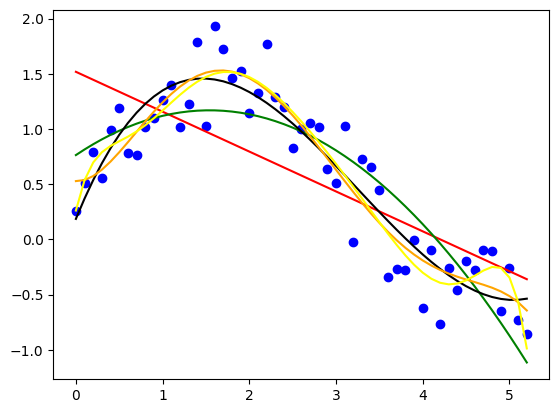

In [16]:
import numpy as np
import matplotlib.pyplot as plt

def ajustar_polinomio(x, y, grau):
    coeficientes = np.polyfit(x, y, grau)[::-1]
    return coeficientes

def prever(x, coeficientes):
    return [sum(coeficientes[j] * (xi ** j) for j in range(len(coeficientes))) for xi in x]

def calcular_eqm(y_real, y_previsto):
    return sum((y_previsto[i] - y_real[i])**2 for i in range(len(y_real))) / len(y_real)

# Exemplo de uso:
plt.scatter(x, y, color='blue')


def plotar_regressoes(x_treino, y_treino, x_teste, y_teste):
    for grau, cor in [(1, 'red'), (2, 'green'), (3, 'black'), (5, 'orange'), (8, 'yellow')]:
        coef = ajustar_polinomio(x_treino, y_treino, grau)
        y_prev_treino = prever(x_treino, coef)
        y_prev_teste = prever(x_teste, coef)

        plt.plot(x_treino, y_prev_treino, color=cor)
        eqm = calcular_eqm(y_teste, y_prev_teste)
        print(f"EQM grau {grau}:", eqm)


plotar_regressoes(x, y, x, y)

plt.show()


h) Para evitar o overfitting, divida os dados aleatoriamente em Dados de Treinamento e Dados de Teste. Use 10% dos dados como conjunto de teste, e o resto como de treinamento.

In [17]:
qtd_elementos = int(0.10 * len(data))
indices_teste = np.random.choice(range(len(data)), size=qtd_elementos, replace=False)

x_teste = [x[i] for i in indices_teste]
y_teste = [y[i] for i in indices_teste]

x_treino = [x[i] for i in range(len(x)) if i not in indices_teste]
y_treino = [y[i] for i in range(len(y)) if i not in indices_teste]

i) Repita os passos de c - f, mas agora use apenas os dados de treinamento para ajustar a linha de regressão.

j) Repita o passo g, mas agora utilize somente os dados de Teste para calcular o erro.

EQM grau 1: 0.27361808359455747
EQM grau 2: 0.22567332756627825
EQM grau 3: 0.0971282428315029
EQM grau 5: 0.08285432663996413
EQM grau 8: 0.11932317953646199


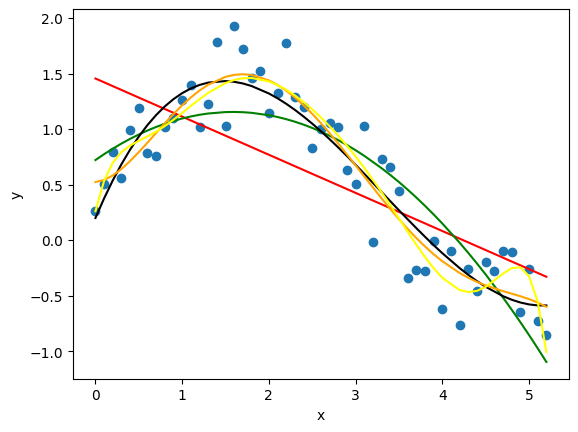

In [18]:
gerar_grafico_dispersao(x, y)
plotar_regressoes(x_treino, y_treino, x_teste, y_teste)

k) Veja o que calcula o Coeficiente de Determinação ou R quadrado. Calcule o R2 para os dados de treino e teste (veja a função r2_score da biblioteca sklearn.metrics). O que se pode concluir com os resultados?